In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
dataset = pd.read_csv("2000-01.csv")

In [29]:
dataset

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,E0,19-08-2000,Charlton,Man City,4,0,H,2,0,H,...,6,6,13,12,8,6,1,2,0,0
1,E0,19-08-2000,Chelsea,West Ham,4,2,H,1,0,H,...,7,7,19,14,2,3,1,2,0,0
2,E0,19-08-2000,Coventry,Middlesbrough,1,3,A,1,1,D,...,8,4,15,21,1,3,5,3,1,0
3,E0,19-08-2000,Derby,Southampton,2,2,D,1,2,A,...,5,8,11,13,0,2,1,1,0,0
4,E0,19-08-2000,Leeds,Everton,2,0,H,2,0,H,...,6,4,21,20,6,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19-05-2001,Man City,Chelsea,1,2,A,1,1,D,...,8,7,22,18,2,2,4,2,0,0
376,E0,19-05-2001,Middlesbrough,West Ham,2,1,H,2,1,H,...,5,6,13,15,5,2,0,0,0,0
377,E0,19-05-2001,Newcastle,Aston Villa,3,0,H,2,0,H,...,5,1,10,14,2,4,0,5,1,1
378,E0,19-05-2001,Southampton,Arsenal,3,2,H,0,1,A,...,7,5,17,10,3,2,1,2,0,0


In [30]:
match_data = dataset.copy()
match_data.drop(['Referee' , 'Div' , 'Date'] , axis = 1  , inplace = True)
match_data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,HS,...,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,Charlton,Man City,4,0,H,2,0,H,20043,17,...,6,6,13,12,8,6,1,2,0,0
1,Chelsea,West Ham,4,2,H,1,0,H,34914,17,...,7,7,19,14,2,3,1,2,0,0
2,Coventry,Middlesbrough,1,3,A,1,1,D,20624,6,...,8,4,15,21,1,3,5,3,1,0
3,Derby,Southampton,2,2,D,1,2,A,27223,6,...,5,8,11,13,0,2,1,1,0,0
4,Leeds,Everton,2,0,H,2,0,H,40010,17,...,6,4,21,20,6,1,1,3,0,0


In [31]:
print(match_data.isnull().values.sum())

0


In [32]:
match_data.dtypes

HomeTeam      object
AwayTeam      object
FTHG           int64
FTAG           int64
FTR           object
HTHG           int64
HTAG           int64
HTR           object
Attendance     int64
HS             int64
AS             int64
HST            int64
AST            int64
HHW            int64
AHW            int64
HC             int64
AC             int64
HF             int64
AF             int64
HO             int64
AO             int64
HY             int64
AY             int64
HR             int64
AR             int64
dtype: object

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
match_data['HomeTeam']= label_encoder.fit_transform(match_data['HomeTeam'])
match_data['AwayTeam']= label_encoder.fit_transform(match_data['AwayTeam'])
match_data['FTR']= label_encoder.fit_transform(match_data['FTR'])
match_data['HTR']= label_encoder.fit_transform(match_data['HTR'])

In [34]:
match_data.dtypes

HomeTeam      int32
AwayTeam      int32
FTHG          int64
FTAG          int64
FTR           int32
HTHG          int64
HTAG          int64
HTR           int32
Attendance    int64
HS            int64
AS            int64
HST           int64
AST           int64
HHW           int64
AHW           int64
HC            int64
AC            int64
HF            int64
AF            int64
HO            int64
AO            int64
HY            int64
AY            int64
HR            int64
AR            int64
dtype: object

In [35]:
match_data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,HS,...,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,3,12,4,0,2,2,0,2,20043,17,...,6,6,13,12,8,6,1,2,0,0
1,4,19,4,2,2,1,0,2,34914,17,...,7,7,19,14,2,3,1,2,0,0
2,5,14,1,3,0,1,1,1,20624,6,...,8,4,15,21,1,3,5,3,1,0
3,6,16,2,2,1,1,2,0,27223,6,...,5,8,11,13,0,2,1,1,0,0
4,9,7,2,0,2,2,0,2,40010,17,...,6,4,21,20,6,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,12,4,1,2,0,1,1,1,34479,3,...,8,7,22,18,2,2,4,2,0,0
376,14,19,2,1,2,2,1,2,33057,19,...,5,6,13,15,5,2,0,0,0,0
377,15,1,3,0,2,2,0,2,51306,9,...,5,1,10,14,2,4,0,5,1,1
378,16,0,3,2,2,0,1,0,15252,11,...,7,5,17,10,3,2,1,2,0,0


In [36]:
cor_mat = match_data.corr()
cor_mat

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,HS,...,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
HomeTeam,1.000000,-0.052632,-0.058480,-0.041964,-0.037375,-0.043605,0.064157,-0.100922,0.268942,0.077540,...,-0.098052,-0.030159,0.086024,-0.053229,-0.000088,0.055294,0.014502,-0.038384,0.096991,-0.007025
AwayTeam,-0.052632,1.000000,-0.041060,0.047293,-0.040697,-0.019230,-0.043100,0.030456,0.001532,0.085910,...,0.131091,-0.025826,0.013825,-0.001825,0.092629,0.027865,0.015227,-0.047806,-0.014310,-0.027321
FTHG,-0.058480,-0.041060,1.000000,-0.075035,0.640468,0.654078,-0.001766,0.393910,0.196364,0.355699,...,0.054765,-0.060627,-0.090509,-0.109856,0.113430,-0.083097,-0.232716,0.024278,-0.053076,0.155072
FTAG,-0.041964,0.047293,-0.075035,1.000000,-0.620884,-0.076501,0.653826,-0.476312,-0.119717,-0.169804,...,0.027134,0.015721,-0.010142,0.001393,0.005199,0.034089,0.202024,-0.076099,0.061510,-0.114221
FTR,-0.037375,-0.040697,0.640468,-0.620884,1.000000,0.435313,-0.402309,0.571343,0.147146,0.270084,...,0.033272,-0.004215,-0.039246,-0.044556,0.072510,-0.113516,-0.253421,0.100745,-0.094493,0.150066
HTHG,-0.043605,-0.019230,0.654078,-0.076501,0.435313,1.000000,-0.091506,0.674504,0.153066,0.153358,...,-0.054763,0.135748,0.039422,-0.074628,0.076731,-0.095962,-0.123230,0.001370,-0.010653,0.103731
HTAG,0.064157,-0.043100,-0.001766,0.653826,-0.402309,-0.091506,1.000000,-0.669586,-0.025282,-0.088645,...,0.090642,-0.087515,-0.083188,0.012139,0.008994,0.039306,0.069708,-0.031470,0.049678,-0.035900
HTR,-0.100922,0.030456,0.393910,-0.476312,0.571343,0.674504,-0.669586,1.000000,0.136396,0.126292,...,-0.089485,0.159572,0.102668,0.002874,0.083221,-0.057986,-0.116733,0.028574,-0.048494,0.083450
Attendance,0.268942,0.001532,0.196364,-0.119717,0.147146,0.153066,-0.025282,0.136396,1.000000,0.218394,...,0.120750,-0.201559,0.056595,-0.008523,0.060376,0.172699,-0.056826,0.011282,0.043250,0.058680
HS,0.077540,0.085910,0.355699,-0.169804,0.270084,0.153358,-0.088645,0.126292,0.218394,1.000000,...,0.396186,-0.253399,-0.102044,0.025106,0.040206,0.054927,-0.196683,0.019813,-0.123465,0.076885


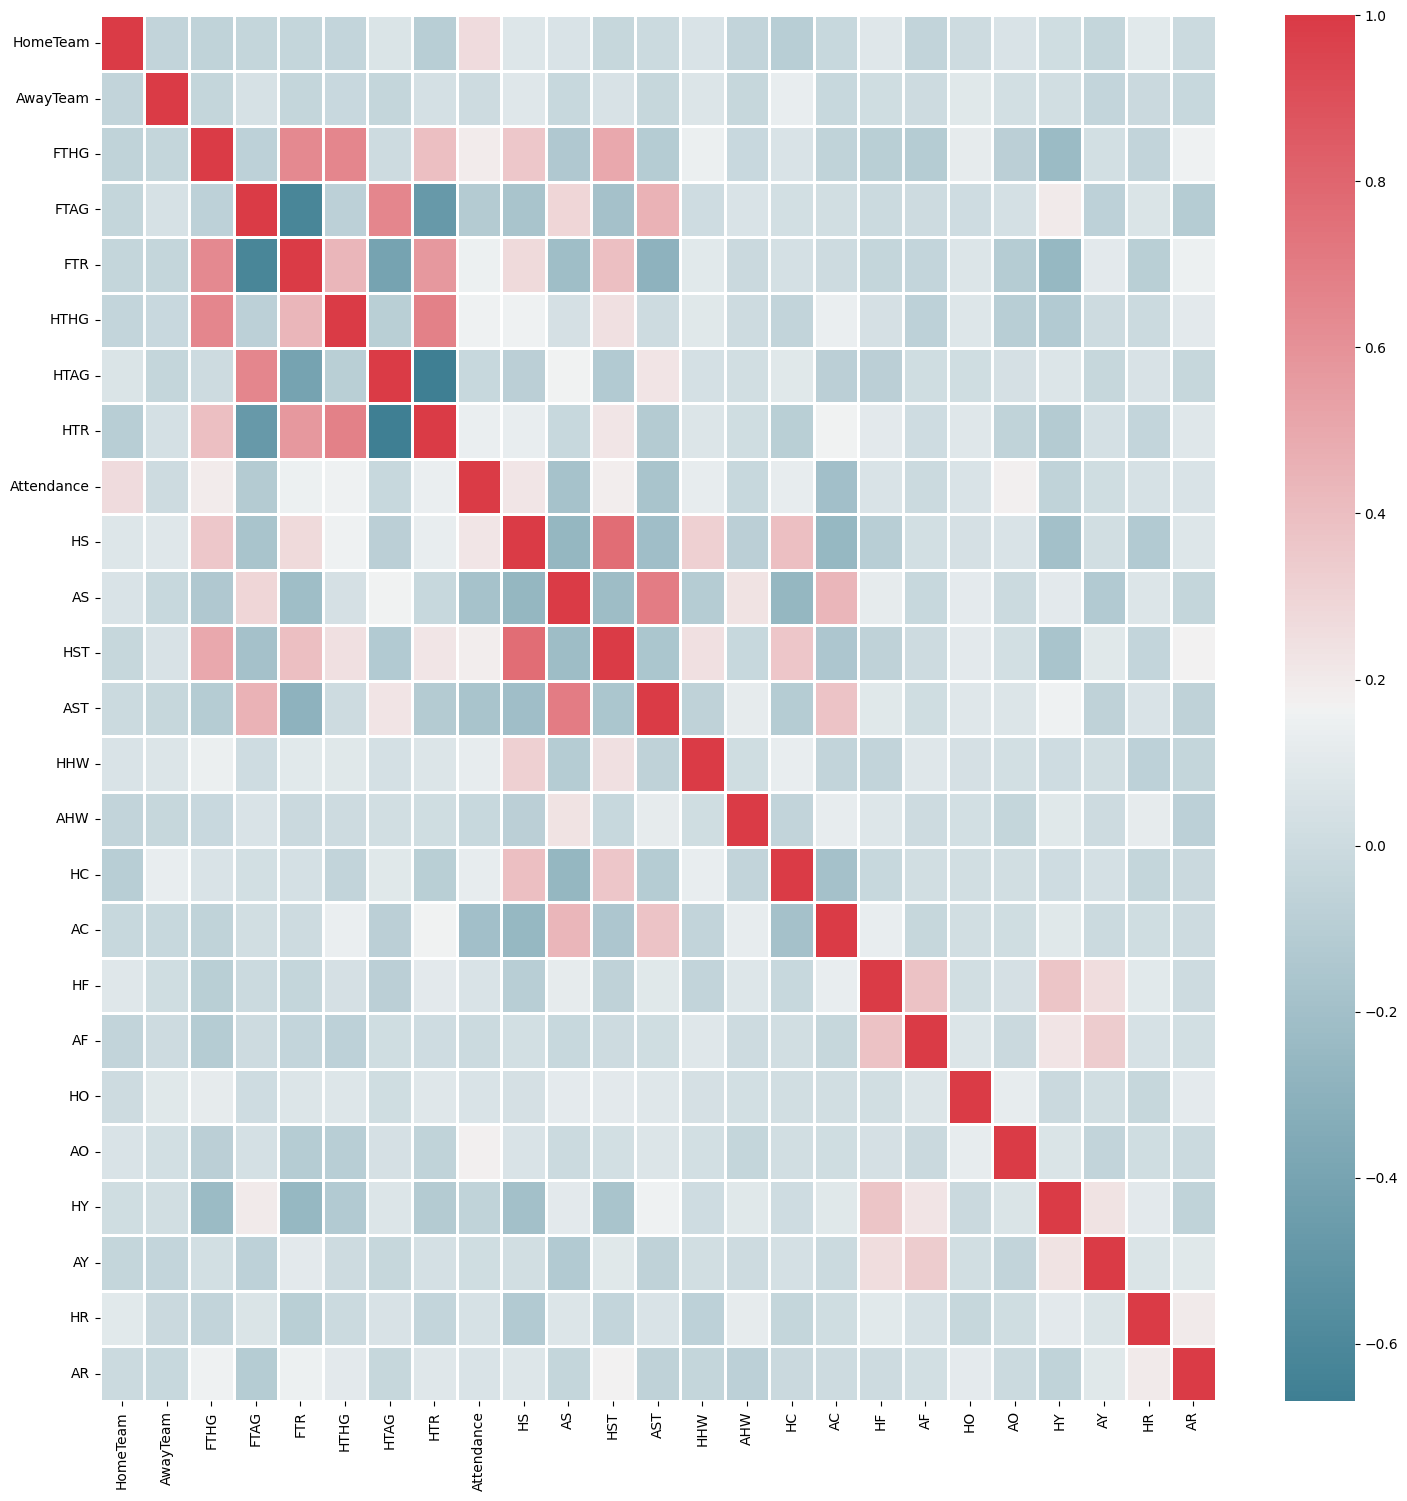

In [37]:
import seaborn as sns
f,ax = plt.subplots(figsize = (18,18))
cmap = sns.diverging_palette(220,10,as_cmap = True)
heatmap = sns.heatmap(cor_mat, cmap = cmap, vmax = 1, linewidths = 1, ax =  ax)
plt.show()

In [38]:
match_data.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'Attendance', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC', 'AC', 'HF',
       'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [39]:
match_data.drop(['Attendance','HHW','AR','AY','HO','AC','HC'] , axis = 1, inplace = True)

In [40]:
X = match_data.drop('FTR',axis = 1).values
Y =match_data['FTR']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(match_data)
X

array([[-1.12724296,  0.43355498,  1.91258007, ...,  0.86938253,
        -0.27595021, -0.29339283],
       [-0.95382097,  1.64750894,  1.91258007, ..., -0.27904862,
        -0.27595021, -0.29339283],
       [-0.78039897,  0.78039897, -0.42433449, ..., -0.27904862,
         2.90165832,  3.19064706],
       ...,
       [ 0.95382097, -1.47408695,  1.13360855, ...,  0.10376176,
        -1.07035235,  3.19064706],
       [ 1.12724296, -1.64750894,  1.13360855, ..., -0.661859  ,
        -0.27595021, -0.29339283],
       [ 1.47408695,  0.60697698,  1.13360855, ..., -0.661859  ,
        -1.07035235, -0.29339283]])

Text(0, 0.5, 'Variance')

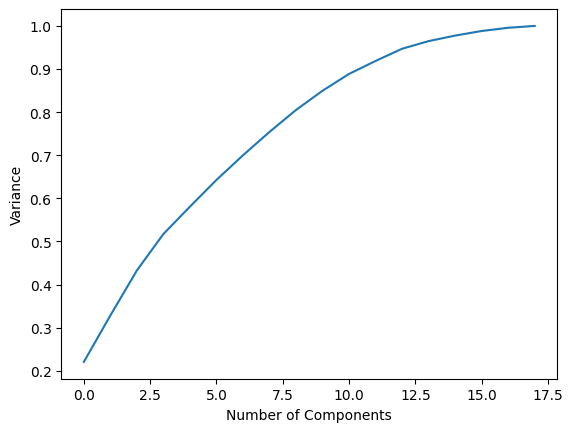

In [42]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
principalComponent = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) #show the maximum number of the independent vector will show max variance
plt.xlabel("Number of Components")
plt.ylabel("Variance")

In [43]:
pca = PCA(n_components = 12 )
X = pca.fit_transform(X)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

In [45]:
print(X_train.shape,
Y_train.shape,
X_test.shape,
Y_test.shape)

(304, 12) (304,) (76, 12) (76,)


In [46]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense

In [47]:
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=3)

In [48]:
model = Sequential()

model.add(Dense(304, activation='relu',input_shape=(12,),))
model.add(Dense(10, input_dim=12, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5


9/9 [==============================] - 1s 16ms/step - loss: 1.0753 - accuracy: 0.4396 - val_loss: 0.9576 - val_accuracy: 0.6774
Epoch 2/5
9/9 [==============================] - 0s 4ms/step - loss: 0.8614 - accuracy: 0.7179 - val_loss: 0.8187 - val_accuracy: 0.6452
Epoch 3/5
9/9 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.7326 - val_loss: 0.6758 - val_accuracy: 0.7097
Epoch 4/5
9/9 [==============================] - 0s 4ms/step - loss: 0.5553 - accuracy: 0.8205 - val_loss: 0.5530 - val_accuracy: 0.8387
Epoch 5/5
9/9 [==============================] - 0s 8ms/step - loss: 0.4473 - accuracy: 0.8828 - val_loss: 0.4539 - val_accuracy: 0.9032


In [50]:
model.summary()

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 304)               3952      
                                                                 
 dense_4 (Dense)             (None, 10)                3050      
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 7035 (27.48 KB)
Trainable params: 7035 (27.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
3/3 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.9474
Test Loss: 0.3621, Test Accuracy: 0.9474


In [51]:
model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


array([[0.04844285, 0.03751724, 0.91403997],
       [0.85939825, 0.11142807, 0.02917369],
       [0.08779594, 0.12071106, 0.79149306],
       [0.33734667, 0.38632292, 0.27633035],
       [0.89234805, 0.08369855, 0.02395337],
       [0.05247887, 0.0410719 , 0.90644926],
       [0.88012457, 0.09504405, 0.02483137],
       [0.0356867 , 0.03672393, 0.92758936],
       [0.23675373, 0.6117056 , 0.15154064],
       [0.2803794 , 0.44866362, 0.27095696],
       [0.08094726, 0.07278472, 0.846268  ],
       [0.07566477, 0.08891197, 0.8354232 ],
       [0.9594708 , 0.03570335, 0.00482577],
       [0.0955803 , 0.09257755, 0.8118422 ],
       [0.60134876, 0.32310304, 0.07554816],
       [0.80698776, 0.16255935, 0.03045294],
       [0.0924072 , 0.11215896, 0.7954339 ],
       [0.17156966, 0.16804911, 0.6603812 ],
       [0.13831294, 0.17920795, 0.6824791 ],
       [0.5187152 , 0.30187687, 0.17940791],
       [0.03186862, 0.02701582, 0.94111556],
       [0.6398849 , 0.24933083, 0.11078428],
       [0.

In [52]:
model.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.3621 - accuracy: 0.9474


[0.36206507682800293, 0.9473684430122375]